In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
img = cv2.imread('../data/supra.jpeg')
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

In [3]:
# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

In [4]:
# Sobel Filter
K_size = 3

# Zero padding
pad = K_size // 2

out_h = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out_v = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out_h[pad:pad + H, pad:pad + W] = gray.copy().astype(np.float)
out_v[pad:pad + H, pad:pad + W] = gray.copy().astype(np.float)

tmp = out_h.copy()

In [5]:
# Sobel vertical
K_v = [[0., -1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]]
# Sobel horizontal
K_h = [[0., 0., 0.],
       [-1., 1., 0.],
       [0., 0., 0.]]

In [6]:
for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h * (tmp[y: y + K_size, x: x + K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v * (tmp[y: y + K_size, x: x + K_size]))

out_h = out_h[pad:pad + H, pad:pad + W].astype(np.uint8)
out_v = out_v[pad:pad + H, pad:pad + W].astype(np.uint8)

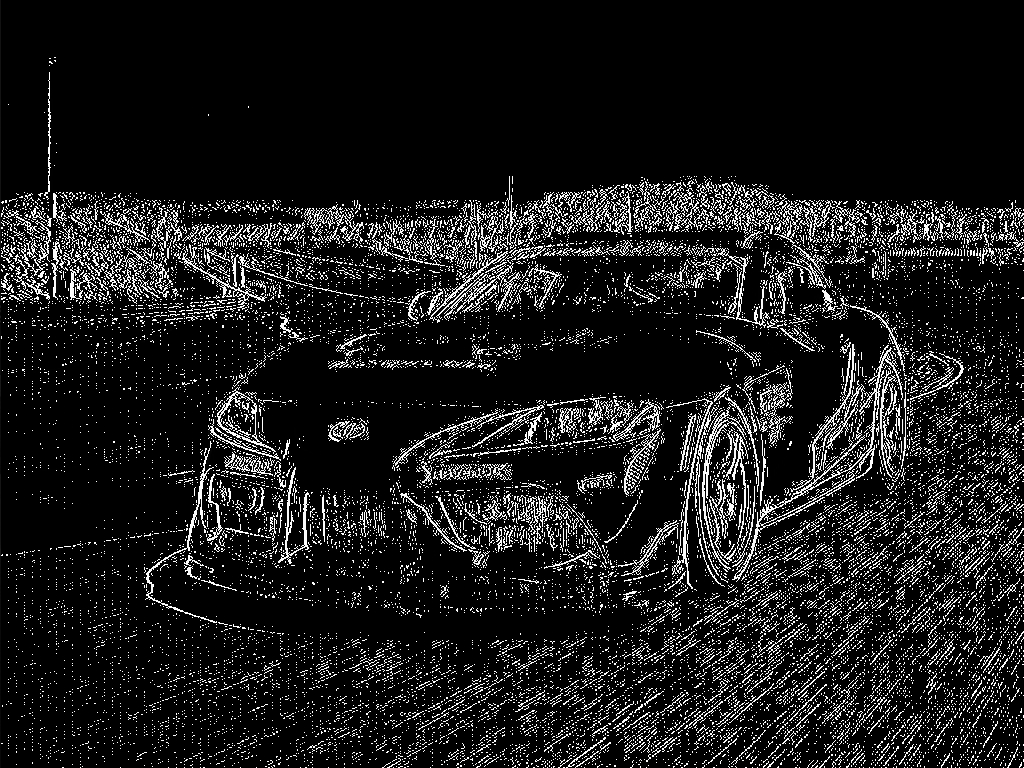

In [7]:
Image.fromarray(out_h)

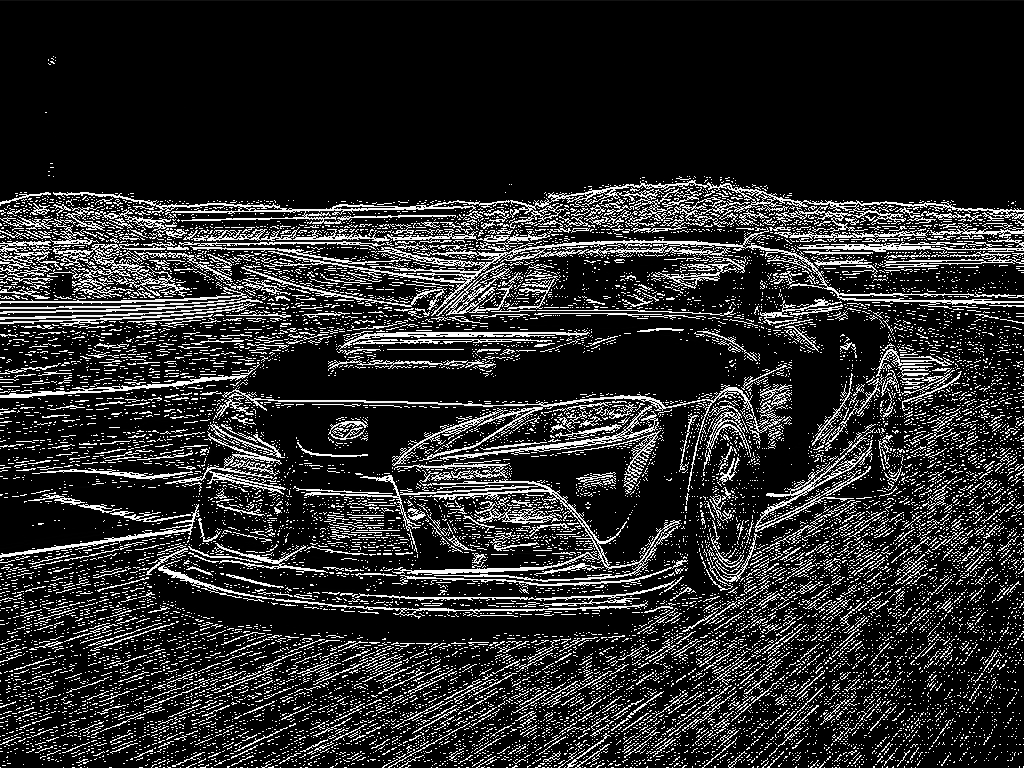

In [8]:
Image.fromarray(out_v)

In [10]:
cv2.imwrite('out14_DiffFilter_h.jpg', out_h)
cv2.imwrite('out14_DiffFilter_v.jpg', out_v)

True